In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#data upload
df = pd.read_csv('Üretim Dataset.csv')

In [42]:
df

,time,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irradiance(W/m²),solar_generation_kwh,wind_turbine_generation_kwh
0,2023-07-09 00:00:00,21.6,69,21,20.8,0.0,0.00,1.56
1,2023-07-09 01:00:00,21.4,66,30,22.0,0.0,0.00,1.65
2,2023-07-09 02:00:00,21.2,67,33,22.0,0.0,0.00,1.65
3,2023-07-09 03:00:00,20.4,62,49,21.9,0.0,0.00,1.64
4,2023-07-09 04:00:00,20.3,62,100,19.7,0.0,0.00,1.50
...,...,...,...,...,...,...,...,...
8803,2024-07-09 19:00:00,28.3,72,0,25.2,154.0,0.52,1.89
8804,2024-07-09 20:00:00,26.9,79,0,25.7,33.6,0.11,1.93
8805,2024-07-09 21:00:00,25.9,84,0,24.3,0.0,0.00,1.82
8806,2024-07-09 22:00:00,25.3,87,0,21.9,0.0,0.00,1.64


In [43]:
#We see what type the parameters in the dataset are/we see the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         8808 non-null   object 
 1   temperature(°C)              8808 non-null   float64
 2   humidity(%)                  8808 non-null   int64  
 3   cloudcover(%)                8808 non-null   int64  
 4   windspeed(km/h)              8808 non-null   float64
 5   irradiance(W/m²)             8808 non-null   float64
 6   solar_generation_kwh         8808 non-null   float64
 7   wind_turbine_generation_kwh  8808 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 550.6+ KB


In [44]:
#We check for empty or missing values in the parameters
print(df.isnull().sum())

time                           0
temperature(°C)                0
humidity(%)                    0
cloudcover(%)                  0
windspeed(km/h)                0
irradiance(W/m²)               0
solar_generation_kwh           0
wind_turbine_generation_kwh    0
dtype: int64


In [45]:
#convert the datetime column to datetime format
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [46]:
#correlation calculation according to solar panel
solar_corr_results = solar_corr['solar_generation_kwh'].sort_values(ascending=False)

In [47]:
solar_corr_results

solar_generation_kwh    1.000000
irradiance(W/m²)        0.971719
temperature(°C)         0.510893
windspeed(km/h)         0.101981
cloudcover(%)          -0.276810
humidity(%)            -0.664843
Name: solar_generation_kwh, dtype: float64

In [48]:
solar_df = df[['temperature(°C)', 'humidity(%)', 'windspeed(km/h)', 'cloudcover(%)', 'irradiance(W/m²)', 'solar_generation_kwh']]

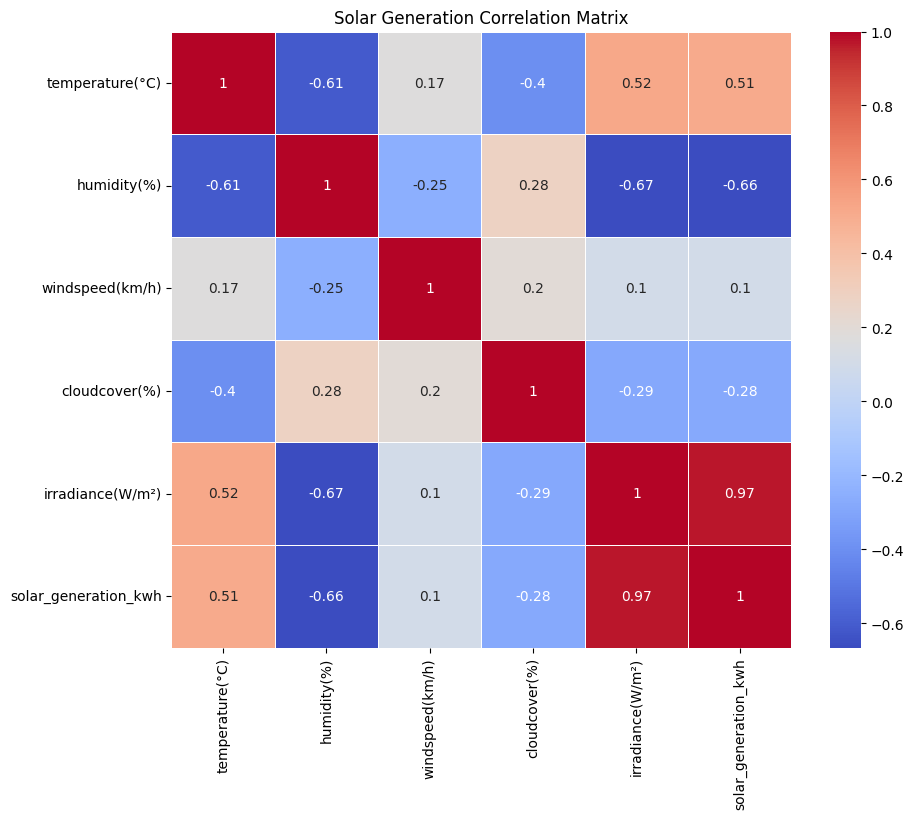

In [49]:
#Correlation heatmap based on solar panel
plt.figure(figsize=(10, 8))
solar_corr = solar_df.corr()
sns.heatmap(solar_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Solar Generation Correlation Matrix')
plt.show()

In [50]:
#correlation calculation according to the wind turbine produced 
wind_corr_results = wind_corr['wind_turbine_generation_kwh'].sort_values(ascending=False)

In [51]:
wind_corr_results

wind_turbine_generation_kwh    1.000000
windspeed(km/h)                0.952710
cloudcover(%)                  0.194939
temperature(°C)                0.175430
irradiance(W/m²)               0.094236
humidity(%)                   -0.243409
Name: wind_turbine_generation_kwh, dtype: float64

In [52]:
wind_df = df[['temperature(°C)', 'humidity(%)', 'windspeed(km/h)', 'cloudcover(%)', 'irradiance(W/m²)', 'wind_turbine_generation_kwh']]

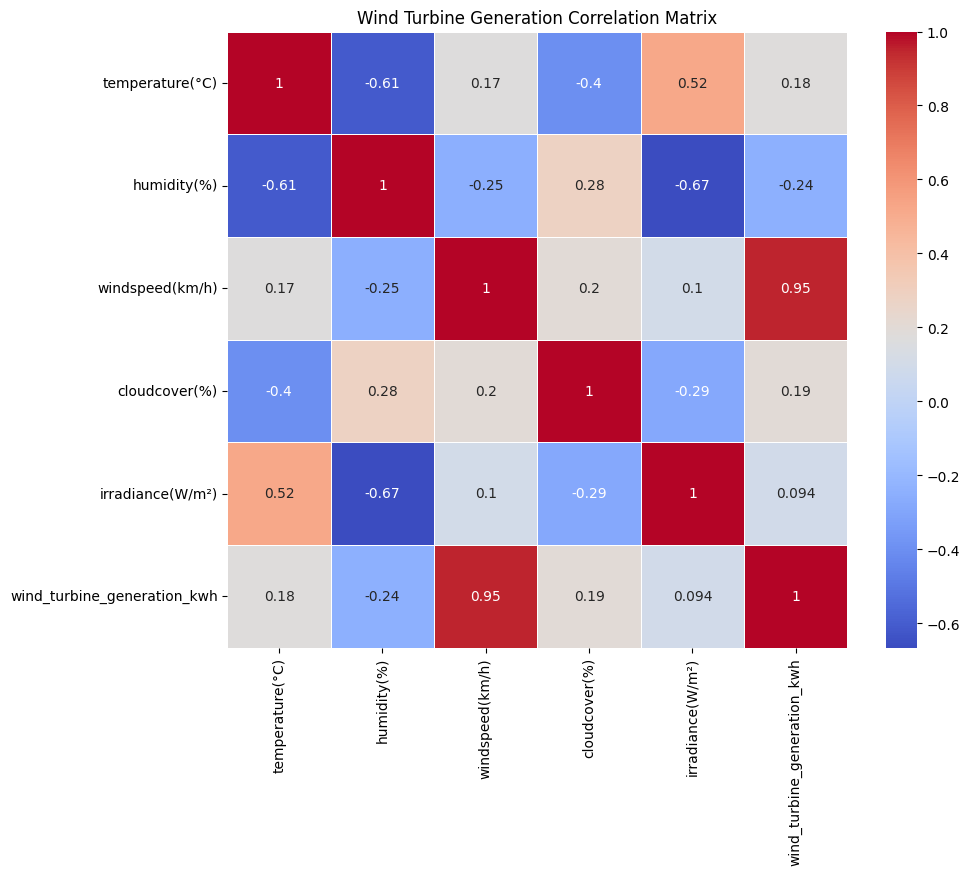

In [53]:
#correlation heatmap
plt.figure(figsize=(10, 8))
wind_corr = wind_df.corr()
sns.heatmap(wind_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Wind Turbine Generation Correlation Matrix')
plt.show()

In [54]:
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.set_index('time')

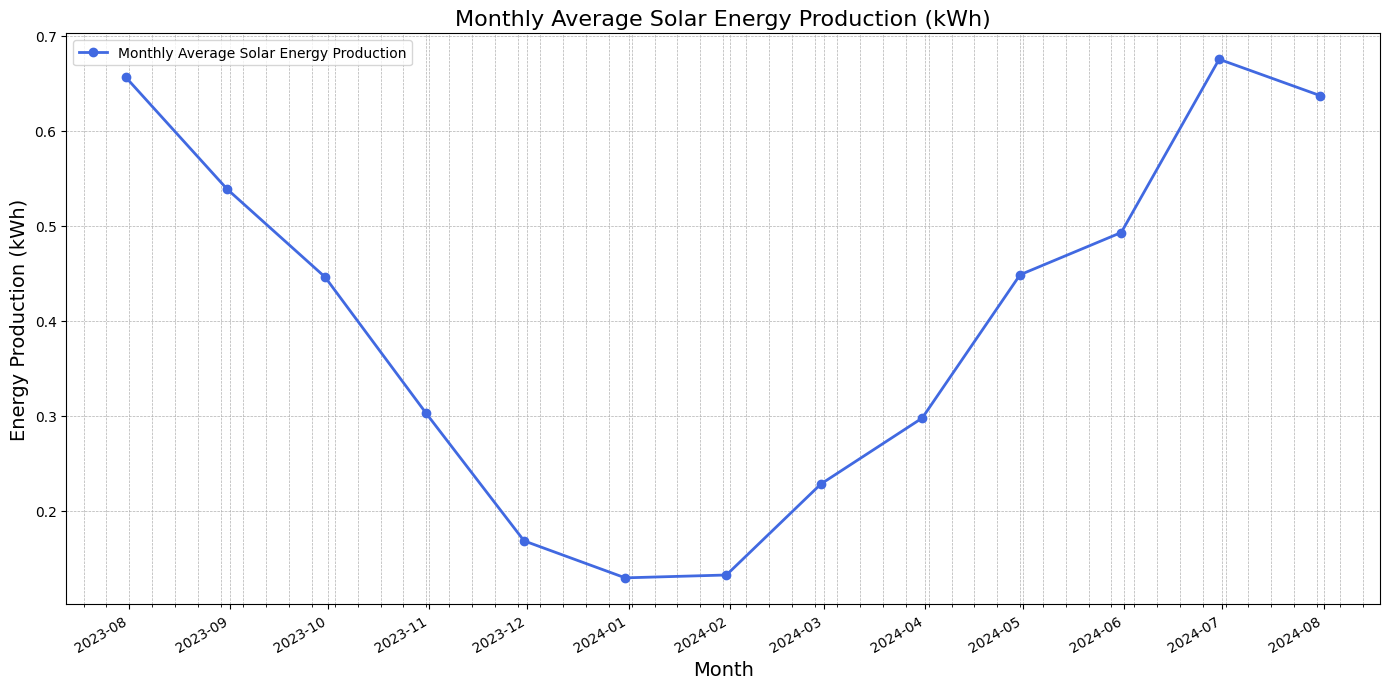

In [55]:
#Group data monthly and calculate average values
monthly_data = df.resample('ME').mean()

#Creating charts
plt.figure(figsize=(14, 7))

# Plot monthly data
plt.plot(monthly_data.index, monthly_data['solar_generation_kwh'], color='royalblue', linestyle='-', marker='o', linewidth=2, label='Monthly Average Solar Energy Production')

# Title and tags
plt.title('Monthly Average Solar Energy Production (kWh)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Production (kWh)', fontsize=14)

# Date format and axis settings
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())
plt.gcf().autofmt_xdate()  # Rotate date tags

# Grid and other settings
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

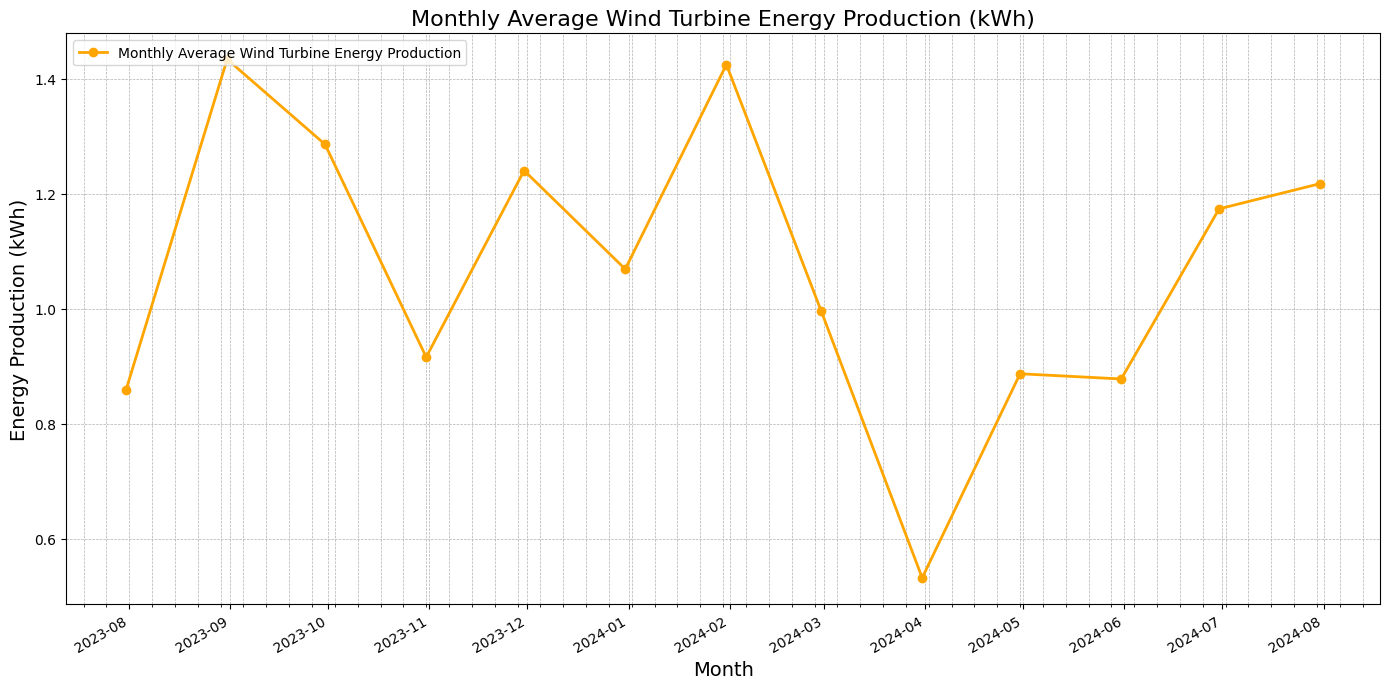

In [56]:
#Group data monthly and calculate average values
monthly_data = df.resample('ME').mean()

#Creating charts
plt.figure(figsize=(14, 7))

# Plot monthly data
plt.plot(monthly_data.index, monthly_data['wind_turbine_generation_kwh'], color='orange', linestyle='-', marker='o', linewidth=2, label='Monthly Average Wind Turbine Energy Production')

#  Title and tags
plt.title('Monthly Average Wind Turbine Energy Production (kWh)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Production (kWh)', fontsize=14)

# Date format and axis settings
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())
plt.gcf().autofmt_xdate()  # Tarih etiketlerini döndür

#Grid and other settings
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')

# Grafiği göster
plt.tight_layout()
plt.show()

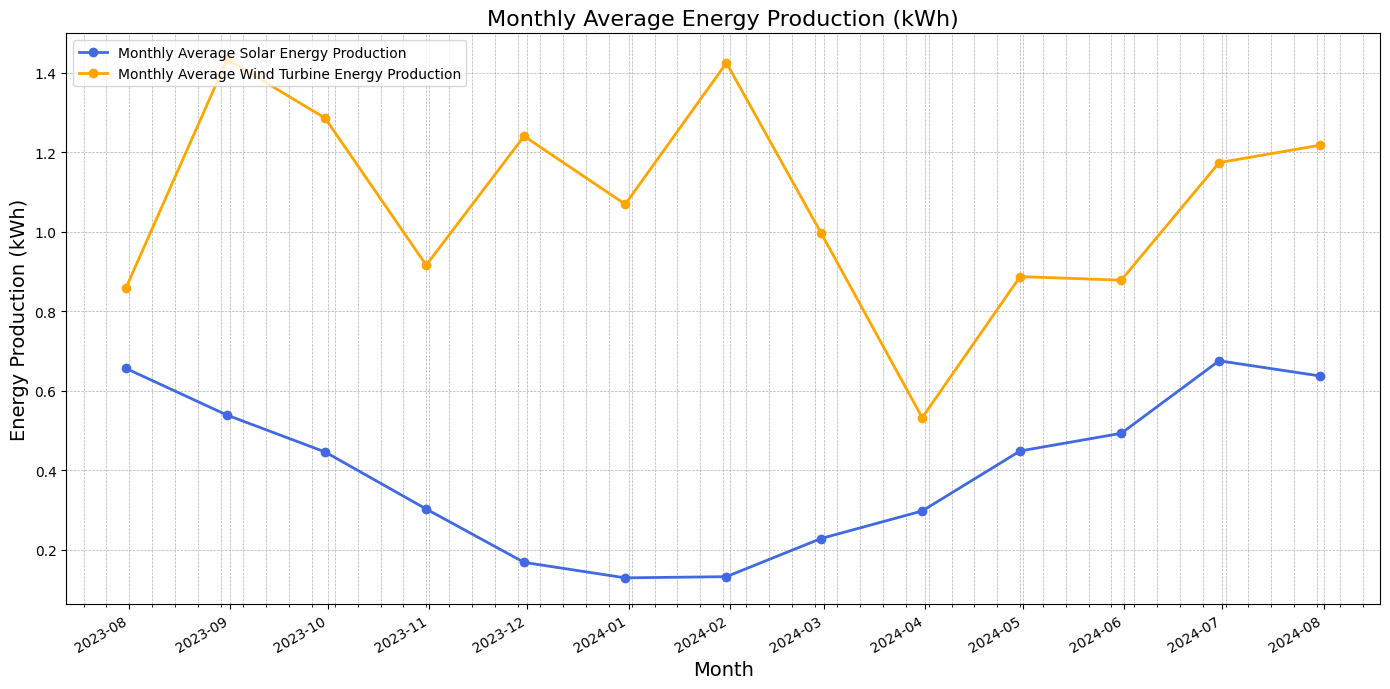

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Group data monthly and calculate average values
monthly_data = df.resample('ME').mean()

# Creating charts
plt.figure(figsize=(14, 7))

#Drawing solar energy production
plt.plot(monthly_data.index, monthly_data['solar_generation_kwh'], color='royalblue', linestyle='-', marker='o', linewidth=2, label='Monthly Average Solar Energy Production')

# Drawing wind turbine energy production
plt.plot(monthly_data.index, monthly_data['wind_turbine_generation_kwh'], color='orange', linestyle='-', marker='o', linewidth=2, label='Monthly Average Wind Turbine Energy Production')

#Title and tags
plt.title('Monthly Average Energy Production (kWh)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Production (kWh)', fontsize=14)

# date format and axis settings
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())
plt.gcf().autofmt_xdate()  # Tarih etiketlerini döndür

# Grid and other settings
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')

# Show chart
plt.tight_layout()
plt.show()


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [59]:
#data upload 
df = pd.read_csv('Üretim Dataset.csv')

# Converting datetime column to datetime format
df['time'] = pd.to_datetime(df['time'])

#Separating required properties and target variables
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irradiance(W/m²)']]
y_solar = df['solar_generation_kwh']
y_wind = df['wind_turbine_generation_kwh']


In [60]:
# Separation into training and test sets
X_train_solar, X_test_solar, y_train_solar, y_test_solar = train_test_split(X, y_solar, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X, y_wind, test_size=0.2, random_state=42)

#Model list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "XGBoost Regressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

#Create DataFrame to store results
results = pd.DataFrame(columns=["Model", "Solar MAE", "Wind MAE", "Solar R²", "Wind R²"])


In [61]:
#Train and evaluate models
for model_name, model in models.items():
    # Solar model eğitimi
    model.fit(X_train_solar, y_train_solar)
    solar_pred = model.predict(X_test_solar)
    solar_mae = mean_absolute_error(y_test_solar, solar_pred)
    solar_r2 = r2_score(y_test_solar, solar_pred)

    #Wind model training
    model.fit(X_train_wind, y_train_wind)
    wind_pred = model.predict(X_test_wind)
    wind_mae = mean_absolute_error(y_test_wind, wind_pred)
    wind_r2 = r2_score(y_test_wind, wind_pred)

    #Save results
    new_row = pd.DataFrame({
        "Model": [model_name],
        "Solar MAE": [solar_mae],
        "Wind MAE": [wind_mae],
        "Solar R²": [solar_r2],
        "Wind R²": [wind_r2]
    })
    results = pd.concat([results, new_row], ignore_index=True)


C:\Users\EOS\AppData\Local\Temp\ipykernel_7004\3920219684.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


In [62]:
# View results
print(results.sort_values(by=["Solar MAE", "Wind MAE"]))

                         Model  Solar MAE  Wind MAE  Solar R²   Wind R²
7            XGBoost Regressor   0.002157  0.002412  0.999922  0.999932
3  Gradient Boosting Regressor   0.002971  0.001842  0.999876  0.999983
1      Decision Tree Regressor   0.003661  0.000057  0.999703  0.999999
4                KNN Regressor   0.004262  0.175358  0.999705  0.893035
8           AdaBoost Regressor   0.031699  0.028882  0.996589  0.998377
2     Support Vector Regressor   0.061070  0.202510  0.987521  0.909405
0            Linear Regression   0.087240  0.207740  0.946124  0.909239
5             Ridge Regression   0.087240  0.207740  0.946124  0.909239
6             Lasso Regression   0.090527  0.237947  0.945236  0.889028


<Figure size 1200x600 with 0 Axes>

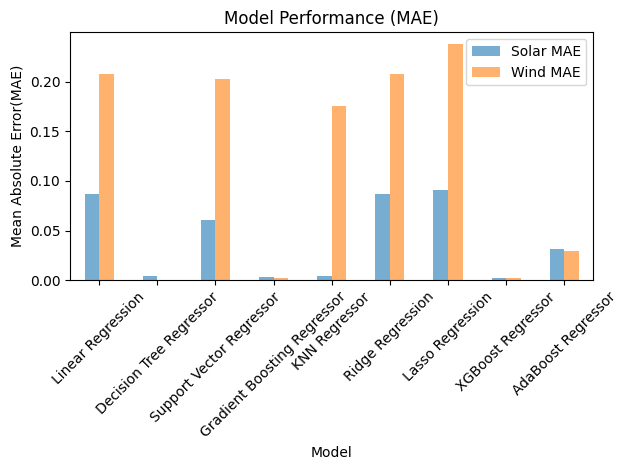

In [63]:
#Visualize results
plt.figure(figsize=(12, 6))
results.set_index('Model')[['Solar MAE', 'Wind MAE']].plot(kind='bar', alpha=0.6)
plt.title('Model Performance (MAE)')
plt.ylabel('Mean Absolute Error(MAE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

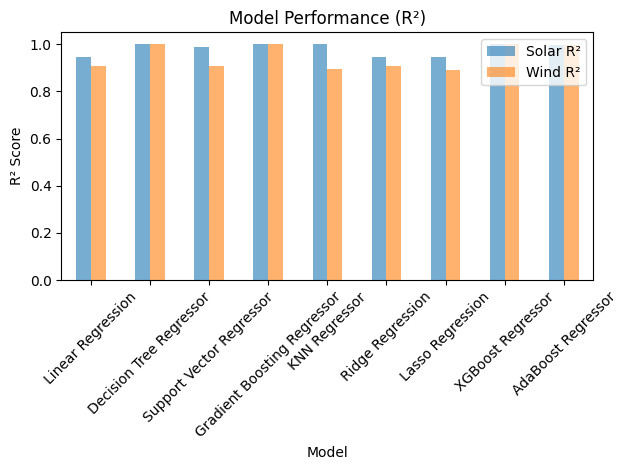

In [64]:
plt.figure(figsize=(12, 6))
results.set_index('Model')[['Solar R²', 'Wind R²']].plot(kind='bar', alpha=0.6)
plt.title('Model Performance (R²)')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
import joblib
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

#choose the best model for solar (XGBoost).
best_solar_model = "XGBoost"
if best_solar_model == "XGBoost":
    best_solar_model_instance = XGBRegressor()
    best_solar_model_instance.fit(X_train_solar, y_train_solar)

# choose the best model for Wind(Decision Tree).
best_wind_model = "Decision Tree"
if best_wind_model == "Decision Tree":
    best_wind_model_instance = DecisionTreeRegressor()
    best_wind_model_instance.fit(X_train_wind, y_train_wind)

# Save models
joblib.dump(best_solar_model_instance, 'XGBoost_Solar_Model.joblib')
joblib.dump(best_wind_model_instance, 'DecisionTree_Wind_Model.joblib')

print("models saved: XGBoost_Solar_Model.joblib ve DecisionTree_Wind_Model.joblib")


models saved: XGBoost_Solar_Model.joblib ve DecisionTree_Wind_Model.joblib
